# Klitschko brothers image classifier

In [1]:
from fastai.vision import *

## Dataset preparation

In [2]:
path = Path('/home/jupyter/tutorials/fastai/data/vitaliy-vs-vladimir')
path.ls()

[PosixPath('/home/jupyter/tutorials/fastai/data/vitaliy-vs-vladimir/other'),
 PosixPath('/home/jupyter/tutorials/fastai/data/vitaliy-vs-vladimir/vladimir'),
 PosixPath('/home/jupyter/tutorials/fastai/data/vitaliy-vs-vladimir/vitaliy'),
 PosixPath('/home/jupyter/tutorials/fastai/data/vitaliy-vs-vladimir/models')]

Will be collecting data from google using python lib
Install python library using pip:
```bash
pip install google_images_download
```
Install Chrome and Chromedriver:
https://sites.google.com/a/chromium.org/chromedriver/downloads

Download data:
```bash
googleimagesdownload -k "vitaliy klichko" -s medium -wr '{"time_min":"01/01/2008","time_max":"01/01/2010"}' -l 500 -o ./vitaliy-vs-vladimir -i train/vitaliy -cd /home/viktor/Programs/chromedriver

googleimagesdownload -k "vladimir klichko" -s medium -wr '{"time_min":"01/01/2008","time_max":"01/01/2010"}' -l 500 -o ./vitaliy-vs-vladimir -i train/vitaliy -cd /home/viktor/Programs/chromedriver
```
As we would also like to know when image doesn't contain any of the brothers we need to have the "other" class
```bash
googleimagesdownload -k "actor" -s medium -l 500 -o ./vitaliy-vs-vladimir -i train/other -cd /home/viktor/Programs/chromedriver

googleimagesdownload -k "male portrait photo" -s medium -l 500 -o ./vitaliy-vs-vladimir -i train/other -cd /home/viktor/Programs/chromedriver

googleimagesdownload -k "random photo" -s medium -l 500 -o ./vitaliy-vs-vladimir -i train/other -cd /home/viktor/Programs/chromedriver
```

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
classes = ['vitaliy', 'vladimir', 'other']

In [12]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## View dataset

In [13]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes

['other', 'vitaliy', 'vladimir']

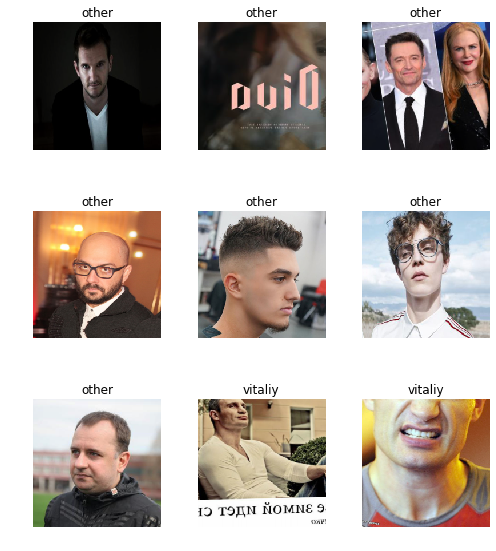

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['other', 'vitaliy', 'vladimir'], 3, 2696, 674)

## Training the model

In [17]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [19]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.285428,0.331369,0.869436,00:28
1,0.294418,0.361211,0.863501,00:28
2,0.296945,0.321384,0.867953,00:28
3,0.268414,0.296258,0.888724,00:28
4,0.235454,0.270214,0.900593,00:29
5,0.199390,0.264970,0.912463,00:29
6,0.167928,0.259455,0.913947,00:29
7,0.147713,0.253640,0.919881,00:29


In [20]:
learn.save('stage-1')

In [21]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


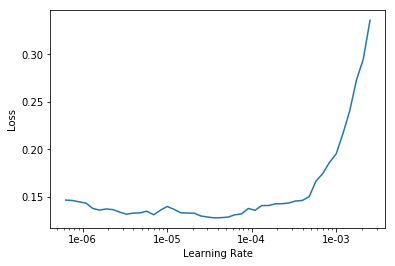

In [23]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.093254,0.207829,0.921365,00:37
1,0.111124,0.199191,0.921365,00:37
2,0.084985,0.147576,0.943620,00:37
3,0.060631,0.142231,0.948071,00:37


In [26]:
learn.save('stage-2')

## Interpretation

In [27]:
learn.load('stage-2');
interp = ClassificationInterpretation.from_learner(learn)

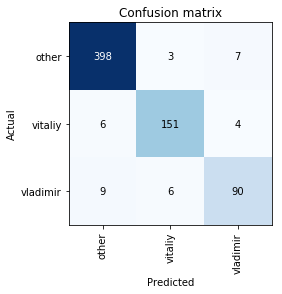

In [28]:
interp.plot_confusion_matrix()

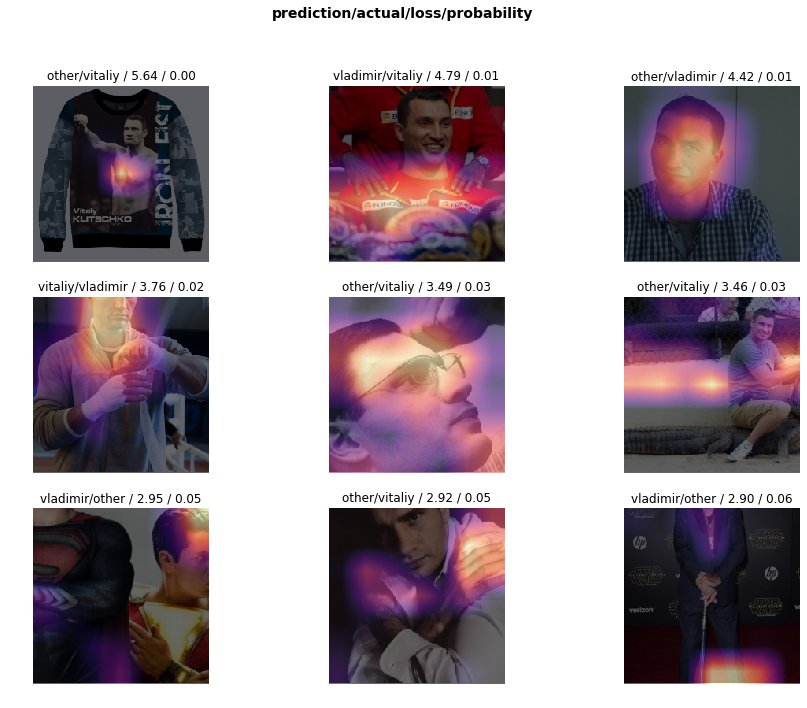

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

## Prod

In [30]:
learn.export()

In [74]:
learn = load_learner(path, file='export.pkl')

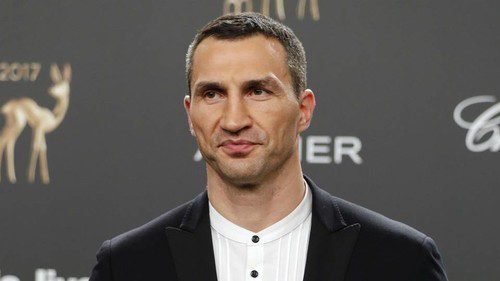

In [75]:
img = open_image('/home/viktor/dev/ml/vladimir.jpg')
img

In [76]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category vladimir

In [106]:
int(to_np(outputs)[try_int(pred_idx)] * 100)

99